Error at epoch 0: 0.287974821321425
Error at epoch 1000: 0.24943329766543199
Error at epoch 2000: 0.24567537147115226
Error at epoch 3000: 0.21996241841579695
Error at epoch 4000: 0.16219924544201417

Final predicted output:
[[0.18002931]
 [0.77614163]
 [0.77606074]
 [0.2801378 ]]


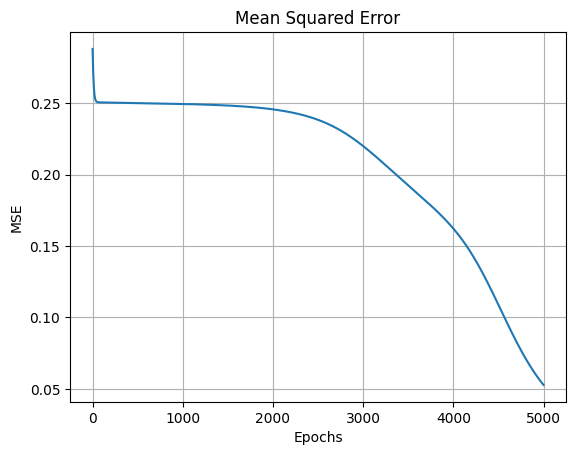

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Input data for XOR function
input_data = np.array([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])

# Target output for XOR function
target_output = np.array([[0],
                          [1],
                          [1],
                          [0]])

# Seed for reproducibility
np.random.seed(42)

# Initialize weights randomly
input_layer_neurons = 2  # Number of input features
hidden_layer_neurons = 2  # Hidden layer neurons
output_neurons = 1  # Output layer neurons

# Random weights and bias initialization
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Learning rate
learning_rate = 0.1

# List to store the Mean Squared Error for plotting
mse_list = []

# Training the neural network
for epoch in range(5000):  # Training for 5,000 epochs
    # Forward propagation
    hidden_layer_activation = np.dot(input_data, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)

    # Calculate the error
    error = target_output - predicted_output

    # Mean Squared Error
    mse = np.mean(error ** 2)
    mse_list.append(mse)

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += input_data.T.dot(d_hidden_layer) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Optional: Print error every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Error at epoch {epoch}: {mse}")

# Final output after training
print("\nFinal predicted output:")
print(predicted_output)

# Plotting Mean Squared Error
plt.plot(mse_list)
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid()
plt.show()
